이상치 : 일부 관측치의 값이 전체 데이터 범위에서 크게 벗어난 아주 작거나 큰 극단적인 값을 갖는 것

데이터 모집단 평균이나 총합을 추정하는 것에 문제를 일으키며

분산을 과도하게 증가시켜 분석이나 모델링의 정확도를 감소시키기 때문에 제거하는 것이 좋다

데이터 특성에 따라 달라지는데, 전체 데이터의 양이 많을 수록 튀는 값이 통계값에 미치는 영향력이 줄어들어

이상치 제거의 필요성이 낮아진다

실제 분석용 데이터에는 잘못 입력된 데이터 혹은 분석 모델의 정확도를 낮추는 이상치들이 많이 존재하는

경우가 대다수이기 때문에 이상치 처리 단계를 거치고 분석 모델링에 들어가는 것이 좋다

극단적인 값은 데이터 분석 모델의 예측력을 약화시키는 주요 원인이 된다

이상치는 해당 값을 결측값으로 대체한 다음 결측값 처리를 하거나

아예 해당 이상치를 제거하는 것이 가장 간단하다

하지만 그렇게 하면 추정치의 분산은 감소하지만 실젯값을 과장하여 편향을 발생시킨다



하한값과 상한값을 결정한 후 하한 값보다 작으면 하한 값으로 대체하고 상한값보다 크면 상한값으로 대체하는

관측값 변경이나 이상치의 영향을 감소시키는 가중치를 주는 가중치 조정 방법을 많이 사용한다


이상치를 선정하는 가장 일반적인 방법은 박스플롯 상에서 분류된 극단치를 그대로 선정하는 방법이 있고,

임의로 허용범위를 설정하여 이를 벗어나는 자료를 이상치로 정의하는 방법이 있다

평균(중위수)로부터 +-n 표준편차 이상 떨어져 있는 값을 이상치로 보는데

보통은 n을 3으로 하지만 경우에 따라 다르게 설정한다

좀 더 정교하게 들어가면, 평균은 이상치에 통계량이 민감하게 변하기 때문에, 이상치에 보다 강건한 중위수와

중위수 절대 편차를 사용하는 것이 좀 더 효과적이다

하지만 무조건 적인 이상치 탐색은 위험할 수 있으므로 효과적인 이상치 탐색을 위해서는 해당 데이터 변수들의

의미와 비즈니스 도메인을 먼저 이해하고 이상치가 생긴 원인을 논리적으로 생각하며 바라보아야 한다

또한 분석 도메인에 따라 이상치가 중요한 분석 요인일 수 있다



# 1. 필요한 패키지 임포트

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 2. 데이터 불러오기 및 확인

In [27]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [28]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

중위수의 값이 27.34인데 최댓값은 94.85로 3배 이상 차이가 난다

# 3. 박스플롯 시각화

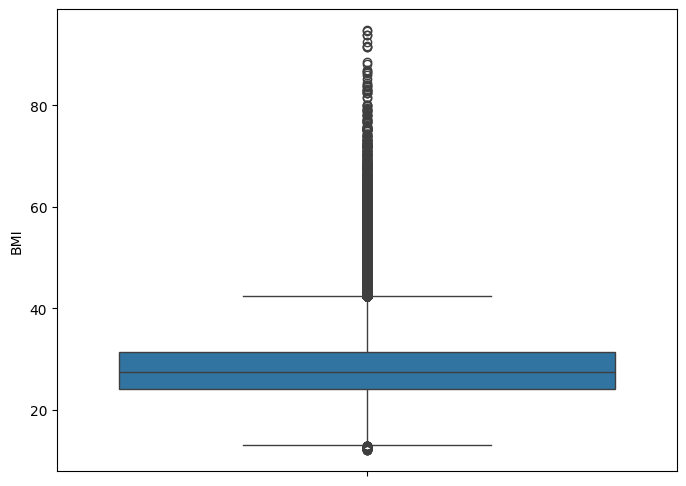

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(y='BMI',data = df)
plt.show()

# 4. IQR3 기준으로 이상치 제거

In [30]:
# Q1, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

# IQR 범위
IQR = Q3 - Q1

# 제거 범위 조절 변수 설정
rev_range = 3

# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range * IQR)
df_rmv = df.loc[filter]

print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


박스플롯 이상치 기준인 IQR 1.5는 정규분포로 환산했을때 2.698과 동일하다

하지만 실무 데이터에서는 분포가 더 넓은 편이기 때문에 IQR 3을 적용해준다

# 5. 이상치 제거 후 박스 플롯 시각화

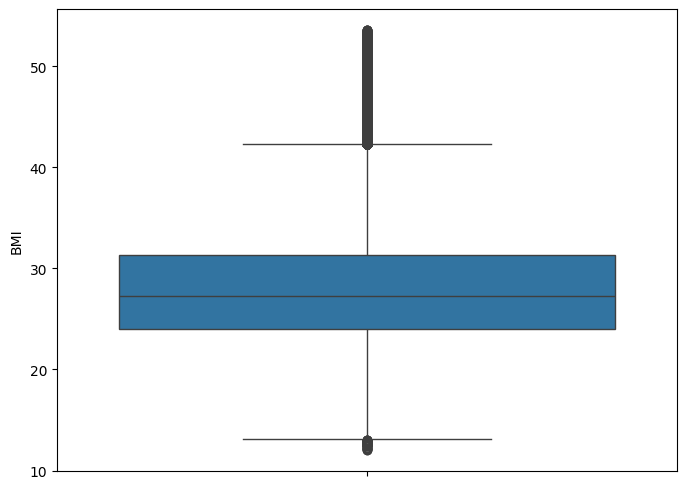

In [31]:
plt.figure(figsize = (8,6))
sns.boxplot(y='BMI', data = df_rmv)
plt.show()

# 6. IQR 3 기준으로 이상치 대치

In [35]:
def replace_outlier_with_vectorization(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3

    # 벡터화된 연산을 이용한 조건부 할당
    lower_bound = Q1 - rev_range * IQR
    upper_bound = Q3 + rev_range * IQR

    # np.where를 사용하여 벡터화된 조건부 할당 수행
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)

    return column

# 벡터화된 연산을 사용하여 이상치 대체
df['BMI'] = replace_outlier_with_vectorization(df['BMI'])

# 결과 확인
print(df['BMI'].describe())

count    319795.000000
mean         28.297843
std           6.214399
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          53.590000
Name: BMI, dtype: float64


# 7. 이상치 대치 후 박스 플롯 시각화

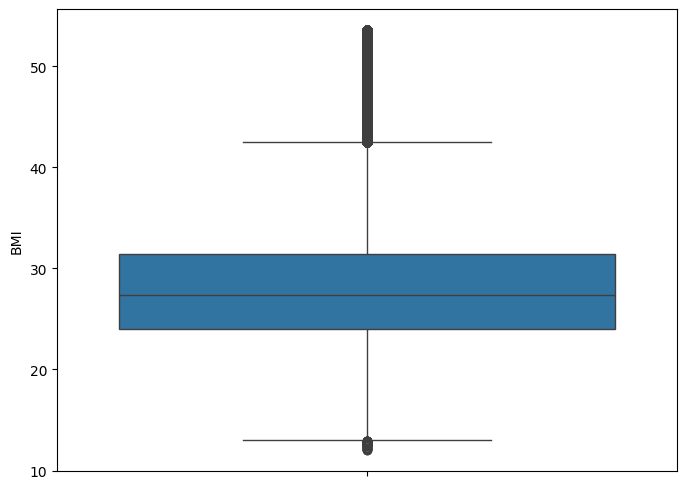

In [36]:
plt.figure(figsize = (8,6))
sns.boxplot(y='BMI', data = df)
plt.show()